#### Голев Александр 235M (3 задание)

# Постановка задачи

*Реализовать программу расчета динамики небольшого (~10-30) числа частиц,
взаимодействующих с помощью потенциалов Леннарда-Джонса и потенциала с двумя
«ямами» из [Netz2003].*

*Считать, что частицы расположены в квадрате с ребром длиной 1,
граничные условия – периодические.
Для реализации использовать один из встроенных методов решения систем ОДУ
среды Матлаб или библиотеки scipy и метод Верле (реализовать самостоятельно).
Параметры потенциалов подобрать экспериментально исходя из числа частиц и
объема области.*
1. Подобрать параметры потенциалов и начальное состояние системы (координаты и
скорости частиц), обеспечивающих нетривиальную динамику системы частиц.
2. Провести серию расчетов с различными начальными температурами системы, качественно
демонстрирующие различное поведение системы частиц для двух указанных потенциалов. В
частности, численно исследовать образование «кластеров» частиц, соответствующих
минимумам потенциальной энергии взаимодействия для потенциала с несколькими «ямами».
3. Визуализировать траектории частиц в системе, динамику полной, потенциальной и
кинетической энергии системы частиц для серий расчетов п. 2.
`

# Теоретическое введение

### Потенциал Леннарда-Джонса

Потенциал Леннарда-Джонса описывает взаимодействие между двумя нейтральными атомами или молекулами. Его формула:

$$
V(r) = 4\epsilon \left[ \left( \frac{\sigma}{r} \right)^{12} - \left( \frac{\sigma}{r} \right)^{6} \right],
$$

где:
- $r$ — расстояние между двумя частицами,
- $\epsilon$ — глубина потенциальной ямы (определяет силу притяжения),
- $\sigma$ — характеристическое расстояние, на котором \(V(r) = 0\).

#### Основные характеристики:
1. **Притяжение на больших расстояниях** $r^{-6}$  
   Это соответствует силам Ван-дер-Ваальса, возникающим из-за взаимной поляризации частиц.
2. **Отталкивание на малых расстояниях** $r^{-12}$
   Моделирует эффект перекрытия электронных оболочек при сближении частиц.
3. **Минимум потенциала**  
   Минимальная энергия достигается на расстоянии $ r_{min} = 2^{1/6} \cdot \sigma$, где $V(r_{min}) = -\epsilon $.

Этот потенциал широко используется в молекулярной динамике для моделирования взаимодействия атомов и молекул в системах, таких как жидкости, газы и твердые тела.

### Потенциал c двумя ямами [Netz2003]

В работе [Netz2003] потенциал с двумя ямами добивается путем добавления к потенциалу Леннарда-Джонса гауссиана.

$$
V(r) = 4\epsilon \left[ \left( \frac{\sigma}{r} \right)^{12} - \left( \frac{\sigma}{r} \right)^{6} \right] + \alpha \exp \left( - \frac{(r - \beta)^{2}}{\gamma^{2}} \right),
$$

#### График:
- При $r < \sigma$: энергия взаимодействия резко возрастает (отталкивание).
- При $r > \sigma$: энергия становится отрицательной, частицы притягиваются.

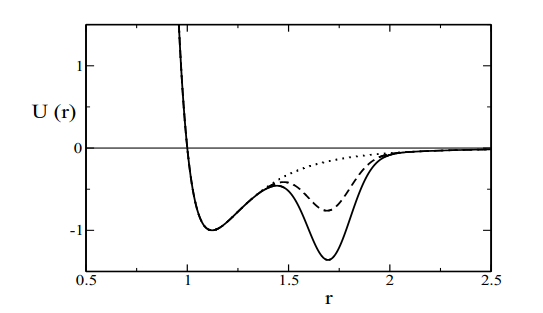

Модель потенциала I (сплошная линия) с внешним более глубоким минимумом и параметрами
α =- 1,2, β = 1,7, γ = 0,15, </br>
Модель потенциала II (штриховая линия) с внутренним более глубоким
минимумом и параметрами α =- 0,6, β = 1,7, γ = 0,15, </br>
по сравнению с нормальным
потенциалом Леннарда-Джонса (пунктирная линия)

Этот потенциал может представлять целое семейство межмолекулярных взаимодействий,
от слабого отталкивающего плеча до глубоких потенциалов двойной ямы, в зависимости от
выбора значений α, β и γ. </br>
На рисунках 1-2 показаны два выбора параметров, которые иллюстрируют два показательных случая: один, в котором внешний минимум
глубже, и другой, в котором внутренний минимум минимален.

# 2. Численное решение

### Метод Стёрмера — Верле

Метод Стёрмера — Верле́ — численный метод решения задачи Коши для дифференциальных уравнений. Часто используется для нахождения траектории материальной точки, движущейся по закону 
$\ddot{x} = a(x,t) $: для вычисления траекторий частиц в моделях молекулярной динамики и в компьютерных играх.

Алгоритм Верле используется для вычисления следующего местоположения точки по текущему и прошлому, без использования скорости.

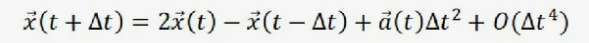

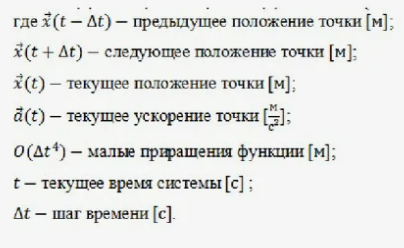

Основная суть алгоритма состоит в том, что новые положения частицы можно найти, зная текущие и предыдущие положения их, то есть без использования скоростей или разностных схем, которые часто неустойчивые.

### Периодические граничные условия
В задаче с частицами в ограниченной области пространства периодические граничные условия (Periodic Boundary Conditions, PBC) используются для моделирования бесконечной среды, несмотря на ограниченный размер области.

Что они значат:
* Когда частица пересекает одну из границ области (например, выходит за пределы квадрата длиной 1), она возвращается с противоположной стороны. 
* Это создаёт иллюзию бесконечного пространства.
* Расстояния между частицами вычисляются с учётом того, что частица, пересекающая границу, "видит" соседние частицы через противоположную сторону.

# 3. Реализация 

Мы реализуем эту задачу с использованием Python. В коде потребуется:

* Реализация потенциала Леннарда-Джонса для взаимодействия частиц.
* Реализация метода Верле для численного решения уравнений движения.
* Использование встроенных методов из библиотеки scipy для сравнения результатов.
* Введение начальных условий, включая позиции и скорости частиц.
* Моделирование с периодическими граничными условиями.
* Построение визуализации (траектории, энергии и т. д.).

### Импорт библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from matplotlib import rc, animation

#### Определение потенциала Леннарда-Джонса и его проиводной

In [2]:
class LjParams:
    def __init__(self, epsilon=1.0, sigma=1.0):
        self.epsilon = epsilon
        self.sigma = sigma

In [3]:
def lj_potential(r, params: LjParams):
    r6 = (params.sigma / r) ** 6
    r12 = r6 ** 2
    return 4 * params.epsilon * (r12 - r6)

In [4]:
def lj_force(r, params: LjParams):
    r6 = (params.sigma / r) ** 6
    r12 = r6 ** 2
    return 24 * params.epsilon * ( r6 - 2 * r12) / r

#### Определение Netz2013 потенциала

In [5]:
class NetzParams:
    def __init__(self, alpha=-0.5, beta= 1.7, gamma = 0.15):
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma

In [6]:
def netz_potential(r, lj_p: LjParams, netz_p: NetzParams ):

    exp_intern = - (r - netz_p.beta)**2 / (netz_p.gamma**2)
    
    return lj_potential(r, lj_p) +  netz_p.alpha * np.exp(exp_intern)

In [7]:
def netz_force(r, lj_p: LjParams, netz_p: NetzParams ):
    exp_intern = - (r - netz_p.beta)**2 / (netz_p.gamma**2)

    return lj_force(r, lj_p) - netz_p.alpha * np.exp(exp_intern) * 2 * (r - netz_p.beta) / (netz_p.gamma**2)

#### Метод верле

In [8]:
# Периодические граничные условия
def apply_periodic_boundary(positions, box_size):
    """Применение периодических граничных условий."""
    return positions % box_size

In [9]:
# Вычисление сил между частицами
def compute_forces(positions, box_size, lj_params: LjParams):
    """Вычисление сил между частицами."""
    num_particles = len(positions)
    forces = np.zeros_like(positions)

    for i in range(num_particles):
        for j in range(i + 1, num_particles):
            # Вычисление расстояния с учетом периодических условий
            delta = positions[i] - positions[j]
            delta = delta - box_size * np.round(delta / box_size)
            r = np.linalg.norm(delta)

            if r > 0:  # Избегаем деления на ноль
                f = lj_force(r, lj_params)
                forces[i] += f * delta / r
                forces[j] -= f * delta / r

    return forces

In [10]:
def verlet_step(positions, prev_positions, forces, dt, box_size, lj_params):
    """Один шаг метода Верле."""
    new_positions = 2 * positions - prev_positions + forces * dt**2
    new_positions = apply_periodic_boundary(new_positions, box_size)

    new_forces = compute_forces(new_positions, box_size, lj_params)

    return new_positions, new_forces

### Начальные условия

In [11]:
def initialize_system(num_particles, box_size, temperature, dt=0.01):
    """Инициализация начальных условий: координат и скоростей."""
    positions = np.random.rand(num_particles, 2) * box_size
    velocities = np.random.randn(num_particles, 2)
    velocities *= np.sqrt(temperature) / np.std(velocities)  # Масштабирование скоростей для заданной температуры
    prev_positions = positions - velocities * dt  # Обратное вычисление предыдущих позиций
    return positions, prev_positions

### Моделирование

In [12]:
def simulate(num_particles=10, box_size=1.0, dt=0.01, steps=1000, lj_params = LjParams(1.0,1.0), temperature=1.0):
    """Основная функция моделирования."""
    positions, prev_positions = initialize_system(num_particles, box_size, temperature, dt)
    forces = compute_forces(positions, box_size, lj_params)

    positions_history = [positions]
    kinetic_energy = []
    potential_energy = []

    for step in range(steps):
        new_positions, forces = verlet_step(positions, prev_positions, forces, dt, box_size, lj_params)
        positions_history.append(new_positions)
        
        

        # Энергии
        pe = 0.5 * sum(
            lj_potential(np.linalg.norm(new_positions[i] - new_positions[j]), lj_params)
            for i in range(num_particles) for j in range(i + 1, num_particles)
        )
        ke = 0.5 * np.sum((new_positions - positions)**2) / dt**2

        kinetic_energy.append(ke)
        potential_energy.append(pe)

    return np.array(positions_history), kinetic_energy, potential_energy

### Визуализация

In [13]:
def visualize( kinetic_energy, potential_energy  ):
    # Энергии
    plt.figure(figsize=(10, 5))
    plt.plot(potential_energy, label='Potential Energy')
    plt.plot(kinetic_energy, label='Kinetic Energy')
    plt.plot(np.array(kinetic_energy) + np.array(potential_energy), label='Total Energy')
    plt.legend()
    plt.title('Energy vs Time')
    plt.xlabel('Time step')
    plt.ylabel('Energy')
    plt.show()

In [14]:
# 7. Визуализация результатов
def animate_simulation(positions_history, box_size):
    """Анимация траекторий частиц."""
    positions_history = np.array(positions_history)
    num_particles = positions_history.shape[1]

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_xlim(0, box_size)
    ax.set_ylim(0, box_size)
    points, = ax.plot([], [], 'bo', markersize=5)

    def update(frame):
        print(frame)
        points.set_data(positions_history[frame, :, 0], positions_history[frame, :, 1])
        return points,

    # Set up formatting for the movie files
    Writer = animation.writers['ffmpeg']
    writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
    
    rc('animation', html='html5')
    ani = animation.FuncAnimation(fig, update, frames=len(positions_history), blit=True, interval=30)
    plt.title('Particle Dynamics')
    plt.xlabel('x')
    plt.ylabel('y')
    ani.save('anim.mp4', writer=writer)
   

# Запустим

C:\Users\golev\AppData\Local\Temp\ipykernel_22284\1481538105.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  r6 = (params.sigma / r) ** 6
C:\Users\golev\AppData\Local\Temp\ipykernel_22284\1481538105.py:4: RuntimeWarning: invalid value encountered in double_scalars
  return 4 * params.epsilon * (r12 - r6)


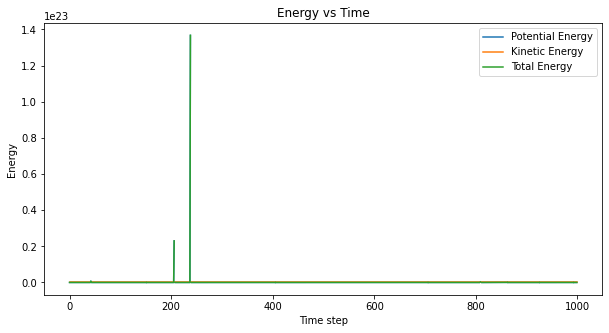

In [15]:
positions_history, ke, pe = simulate(num_particles=3, box_size=1.0, steps=1000, temperature=1.0)
visualize( ke, pe)

RuntimeError: Requested MovieWriter (ffmpeg) not available

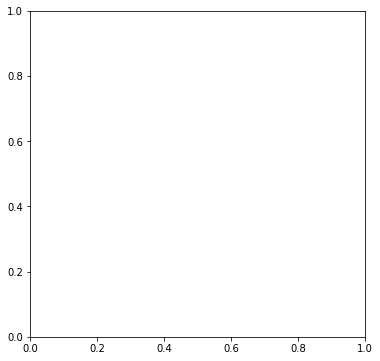

: 

In [20]:
animate_simulation(positions_history, box_size=1.0)

